In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import geopandas as gpd


In [34]:
!pip install pycountry

  Using cached pycountry-24.6.1-py3-none-any.whl.metadata (12 kB)
Using cached pycountry-24.6.1-py3-none-any.whl (6.3 MB)


In [26]:
!pip install geopandas

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyproj-3.7.0-cp310-cp310-win_amd64.whl.metadata (31 kB)
  Using cached shapely-2.0.6-cp310-cp310-win_amd64.whl.metadata (7.2 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/16.2 MB 1.3 MB/s eta 0:00:13
   - -------------------------------------- 0.5/16.2 MB 4.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/16.2 MB 5.7 MB/s eta 0:00:03
   ----- ---------------------------------- 2.4/16.2 MB 12.6 MB/s eta 0:00:02
   ------- -------------------------------- 3.0/16.2 MB 12.0 MB/s eta 0:00:02
   -------- ------------------------------- 3.4/16.2 MB 11.3 MB/s eta 0:00:02
   --------- ------------------------------ 3.7/16.2 MB 10.8 MB/s eta 0:00:02
   ---------- ----------------------------- 4.2/16.2

In [19]:
!pip install wordcloud

   ---------------------------------------- 0.0/299.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.8 kB ? eta -:--:--
   ---------- ----------------------------- 81.9/299.8 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 299.8/299.8 kB 3.1 MB/s eta 0:00:00


In [20]:
from wordcloud import WordCloud
print("WordCloud module is successfully imported!")


WordCloud module is successfully imported!


In [7]:
# Correct file path
file_path = r"C:\Users\yzmen\Downloads\Salaries_updated_with_categories.csv"

# Load the dataset
salaries_data = pd.read_csv(file_path)

# Verify the dataset
print(salaries_data.head())

   work_year experience_level employment_type             job_title  salary  \
0       2024               MI              FT          AI Architect  800000   
1       2023               EN              FT  Data DevOps Engineer   44382   
2       2024               EN              FT          Data Analyst   40100   
3       2024               EN              FT          Data Analyst   28069   
4       2024               SE              FT         Data Engineer  220000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         800000                 CA           100   
1             EUR          47918                 NL            50   
2             EUR          44555                 LT             0   
3             EUR          31187                 LT             0   
4             USD         220000                 US             0   

  company_location company_size   Job_Category  
0               CA            M          Other  
1           

In [10]:
file_path = r"C:\Users\yzmen\Downloads\Salaries_updated_with_categories.csv"

# Load the dataset
salaries_data = pd.read_csv(file_path)

# Verify the dataset
print(salaries_data.head())

   work_year experience_level employment_type             job_title  salary  \
0       2024               MI              FT          AI Architect  800000   
1       2023               EN              FT  Data DevOps Engineer   44382   
2       2024               EN              FT          Data Analyst   40100   
3       2024               EN              FT          Data Analyst   28069   
4       2024               SE              FT         Data Engineer  220000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         800000                 CA           100   
1             EUR          47918                 NL            50   
2             EUR          44555                 LT             0   
3             EUR          31187                 LT             0   
4             USD         220000                 US             0   

  company_location company_size   Job_Category  
0               CA            M          Other  
1           

In [12]:
# Correct file path
file_path = r"C:\Users\yzmen\Downloads\Salaries_updated_with_categories.csv"

# Load the dataset into job_data
job_data = pd.read_csv(file_path)

In [13]:
job_trends = salaries_data.groupby('work_year')['job_title'].count()


In [14]:
job_trends = salaries_data.groupby('work_year')['job_title'].count()


In [15]:
job_trends = salaries_data.groupby('work_year')['job_title'].count()


In [16]:
print(job_data.columns)


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'Job_Category'],
      dtype='object')


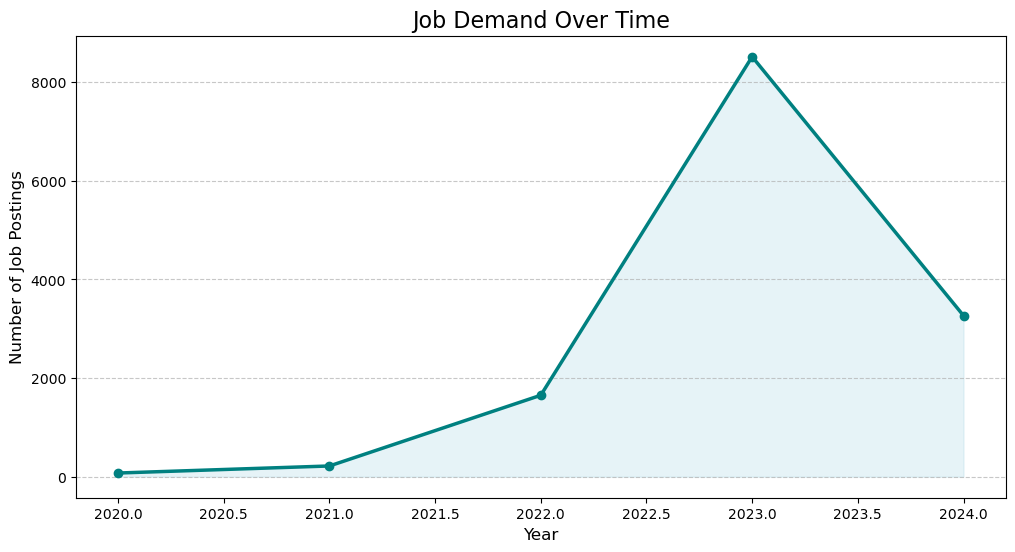

In [17]:
# Correct file path
file_path = r"C:\Users\yzmen\Downloads\Salaries_updated_with_categories.csv"

# Load the dataset
job_data = pd.read_csv(file_path)

# Group data by work_year and count job postings
job_trends = job_data.groupby('work_year')['job_title'].count()

# Eye-candy line chart
plt.figure(figsize=(12, 6))
plt.plot(job_trends.index, job_trends.values, marker='o', linestyle='-', color='teal', linewidth=2.5)
plt.fill_between(job_trends.index, job_trends.values, color='lightblue', alpha=0.3)
plt.title("Job Demand Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

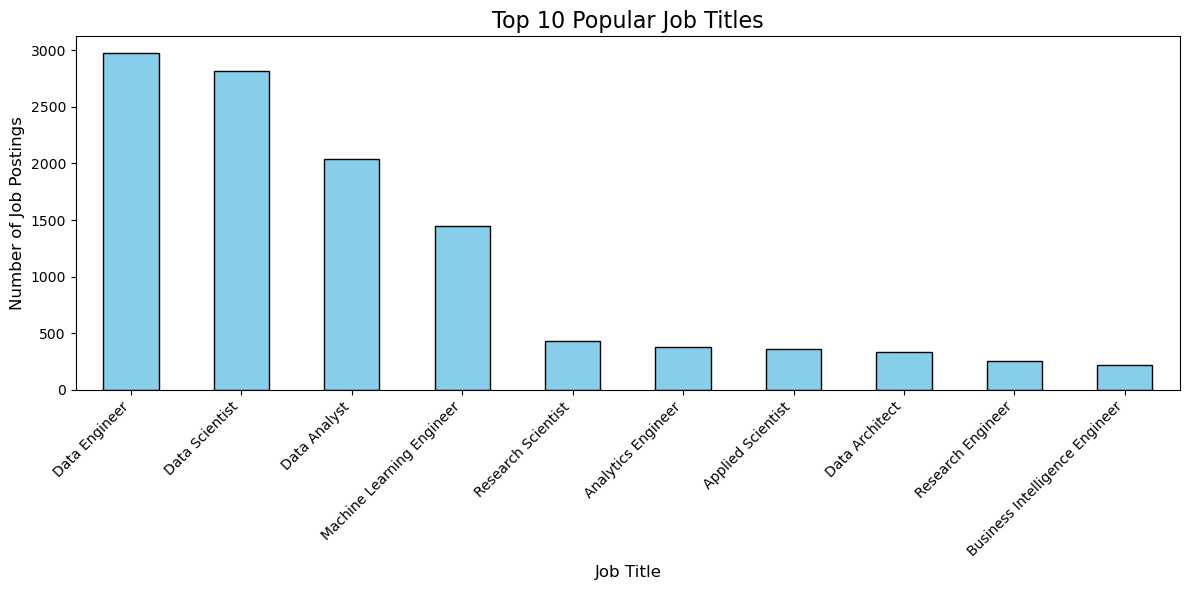

In [23]:
# Count occurrences of each job title
job_title_counts = job_data['job_title'].value_counts().head(10)  # Top 10 job titles

# Create a bar chart
plt.figure(figsize=(12, 6))
job_title_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title("Top 10 Popular Job Titles", fontsize=16)
plt.xlabel("Job Title", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the chart
plt.show()

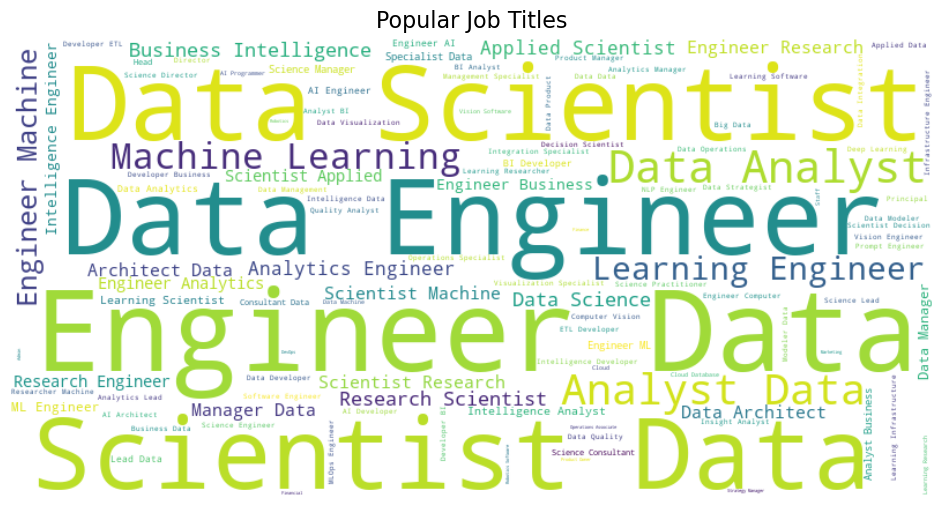

In [22]:
# Combine all job titles into a single string
job_titles = " ".join(job_data['job_title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(job_titles)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Popular Job Titles", fontsize=16)
plt.show()

In [29]:
# Path to the extracted Natural Earth shapefile
world_map_path = r"C:\Project files\ne_110m_admin_0_countries.shp"

# Load the shapefile
world = gpd.read_file(world_map_path)

# Verify the GeoDataFrame
print(world.head())  # Display the first few rows of the GeoDataFrame

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

In [39]:
import pycountry

# Function to map ISO 2-letter to ISO 3-letter country codes
def convert_iso2_to_iso3(iso2):
    try:
        return pycountry.countries.get(alpha_2=iso2).alpha_3
    except AttributeError:
        return None

# Add a new column with 3-letter ISO codes
job_data['iso_a3'] = job_data['employee_residence'].apply(convert_iso2_to_iso3)

# Check the updated DataFrame
print(job_data[['employee_residence', 'iso_a3']].head())


  employee_residence iso_a3
0                 CA    CAN
1                 NL    NLD
2                 LT    LTU
3                 LT    LTU
4                 US    USA


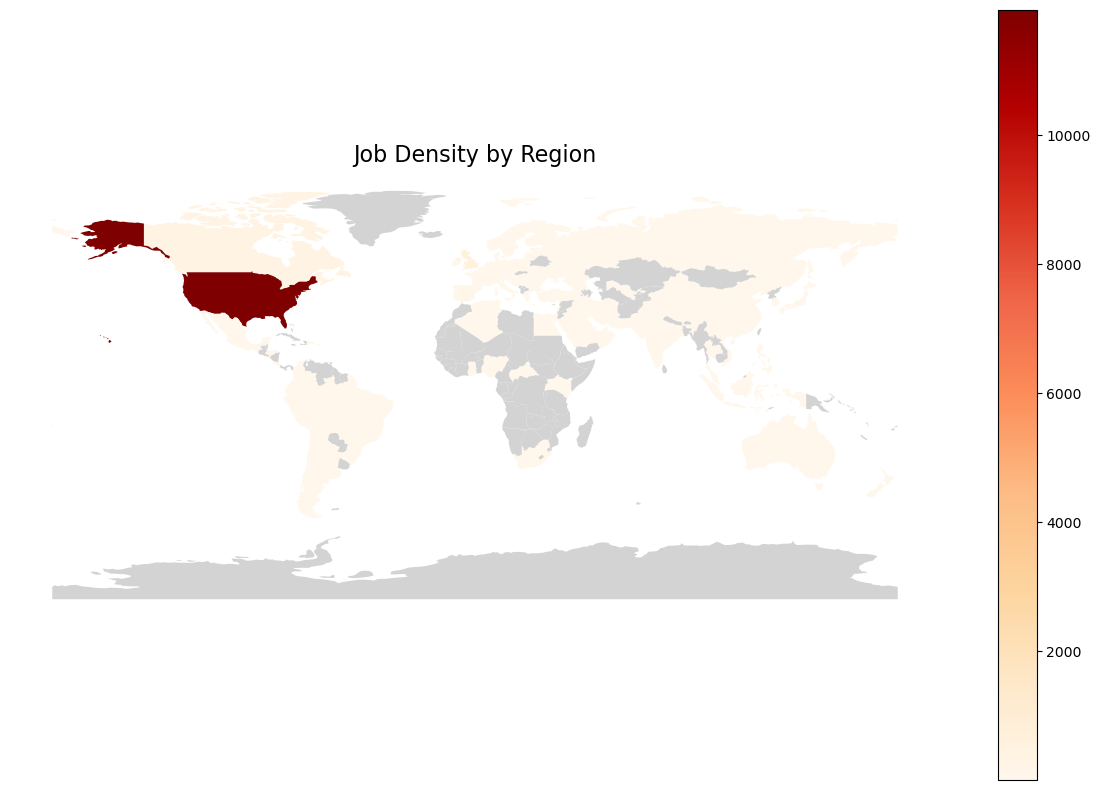

In [40]:
# Group data by the new 3-letter ISO column
region_data = job_data.groupby('iso_a3')['job_title'].count().reset_index()
region_data.columns = ['ADM0_A3', 'job_count']  # Rename columns for merging

# Merge with the world GeoDataFrame
merged_data = world.merge(region_data, on='ADM0_A3', how='left')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(
    column='job_count', 
    cmap='OrRd', 
    legend=True, 
    ax=ax, 
    missing_kwds={"color": "lightgrey"}
)

# Add title and remove axis
plt.title("Job Density by Region", fontsize=16)
plt.axis("off")
plt.show()


In [41]:
print(region_data.sort_values(by='job_count', ascending=False).head(10))


   ADM0_A3  job_count
84     USA      11946
31     GBR        597
13     CAN        346
27     ESP        131
21     DEU         89
40     IND         73
30     FRA         60
5      AUS         42
70     PRT         30
61     NLD         28


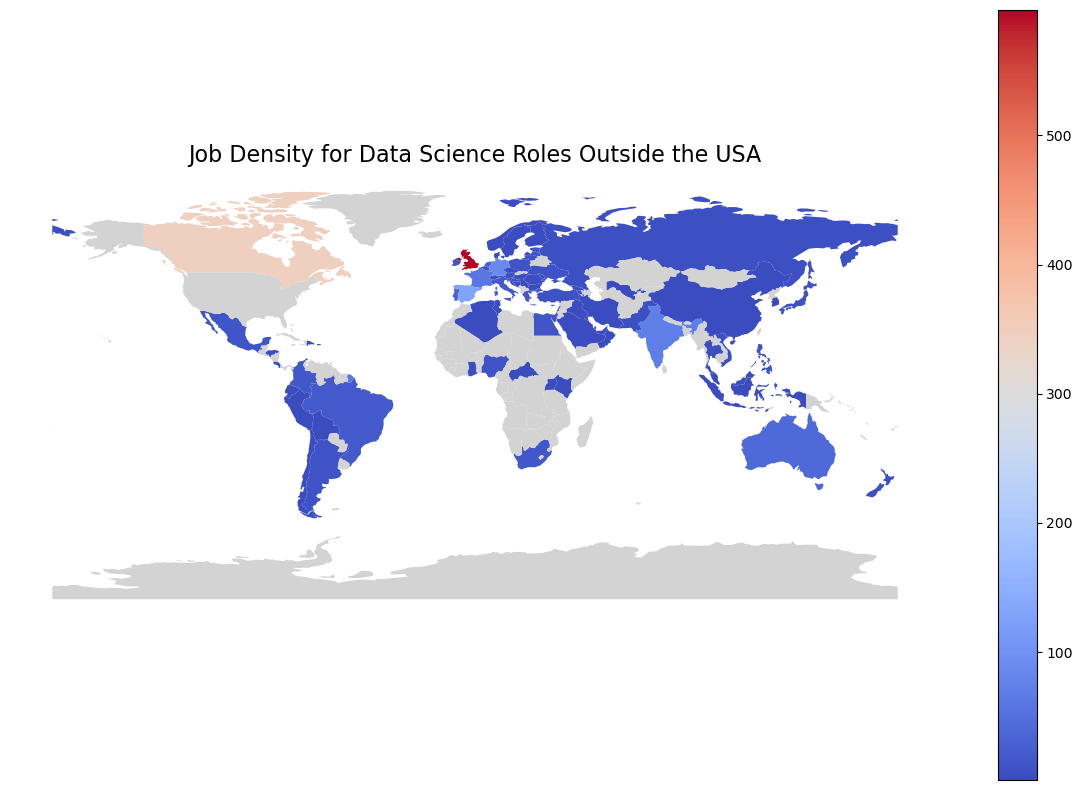

In [42]:
non_us_data = region_data[region_data['ADM0_A3'] != 'USA']
merged_non_us = world.merge(non_us_data, on='ADM0_A3', how='left')

# Plot non-USA map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_non_us.plot(
    column='job_count', 
    cmap='coolwarm', 
    legend=True, 
    ax=ax, 
    missing_kwds={"color": "lightgrey"}
)
plt.title("Job Density for Data Science Roles Outside the USA", fontsize=16)
plt.axis("off")
plt.show()


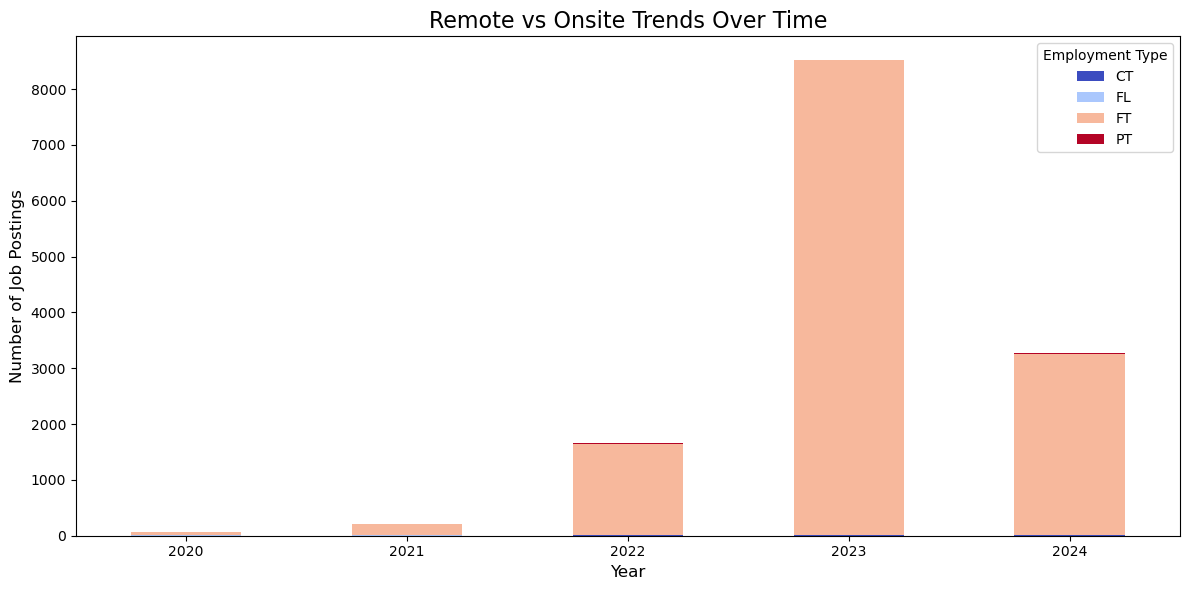

In [46]:
# Group by work_year and employment type
remote_onsite_trends = job_data.groupby(['work_year', 'employment_type'])['job_title'].count().unstack()

# Stacked bar chart
remote_onsite_trends.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

# Add chart details
plt.title("Remote vs Onsite Trends Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Employment Type", fontsize=10)
plt.tight_layout()

# Show the chart
plt.show()

In [47]:
# Unique values in employment_type
print(job_data['employment_type'].unique())

# Count the occurrences of each employment type
employment_counts = job_data['employment_type'].value_counts()
print(employment_counts)

['FT' 'CT' 'PT' 'FL']
employment_type
FT    13670
CT       26
PT       22
FL       12
Name: count, dtype: int64


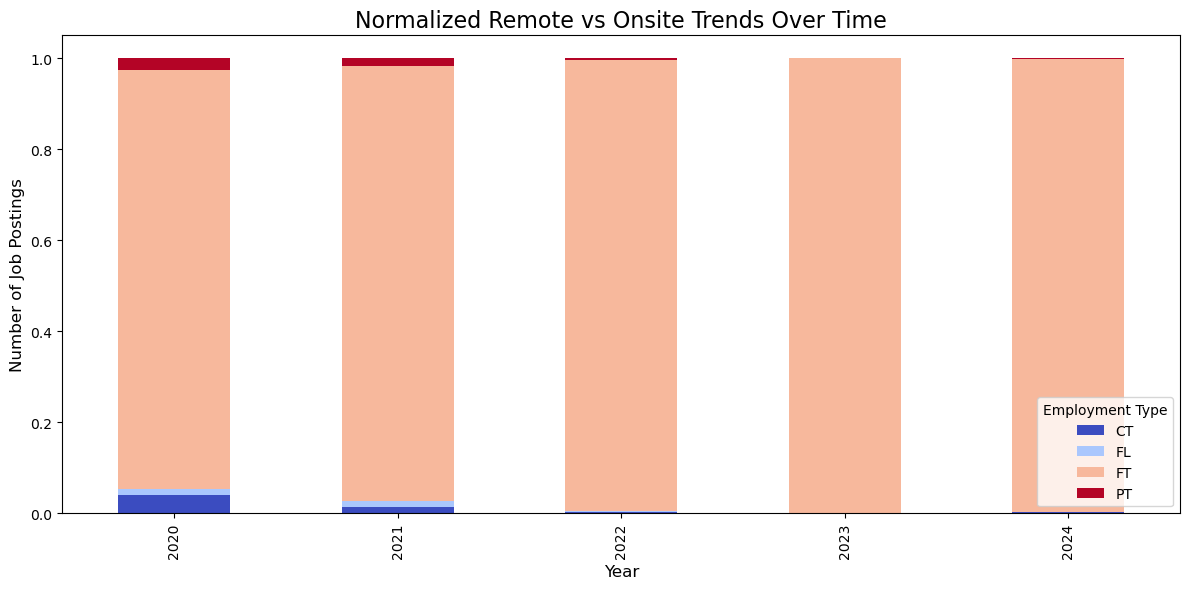

In [50]:
# Normalize the data by year
remote_onsite_trends_normalized = remote_onsite_trends.div(remote_onsite_trends.sum(axis=1), axis=0)

# Plot normalized stacked bar chart
remote_onsite_trends_normalized.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Normalized Remote vs Onsite Trends Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.legend(title="Employment Type", fontsize=10)
plt.tight_layout()
plt.show()

In [49]:
# Check for missing values
print(job_data['employment_type'].isnull().sum())

# Replace missing or inconsistent values if needed
job_data['employment_type'] = job_data['employment_type'].fillna('Unknown')

0


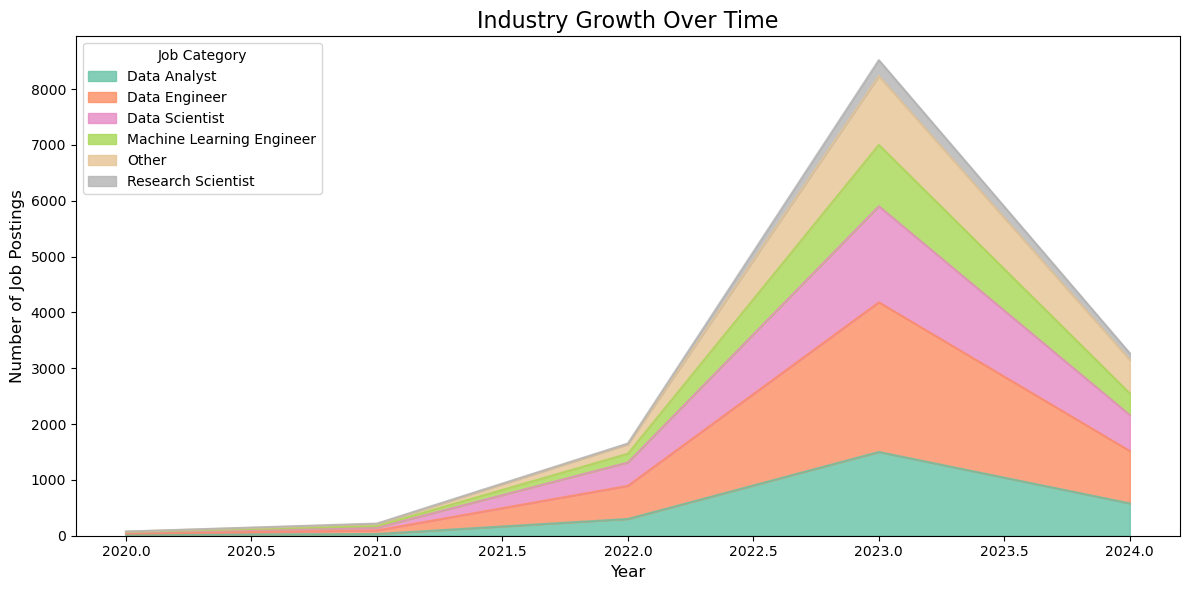

In [53]:
# Group by work_year and Job_Category, calculate job counts
industry_trends = job_data.groupby(['work_year', 'Job_Category'])['job_title'].count().unstack()

# Plot the area chart
industry_trends.plot(kind='area', figsize=(12, 6), colormap='Set2', alpha=0.8)

# Add chart details
plt.title("Industry Growth Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.legend(title="Job Category", fontsize=10, loc='upper left')
plt.tight_layout()

# Add annotations
for year, row in industry_trends.iterrows():
    for category, value in row.items():
        if value > 7000:  # Annotate peaks above 7000
            plt.text(year, value, f'{int(value)}', ha='center', fontsize=9)

# Show the chart
plt.show()

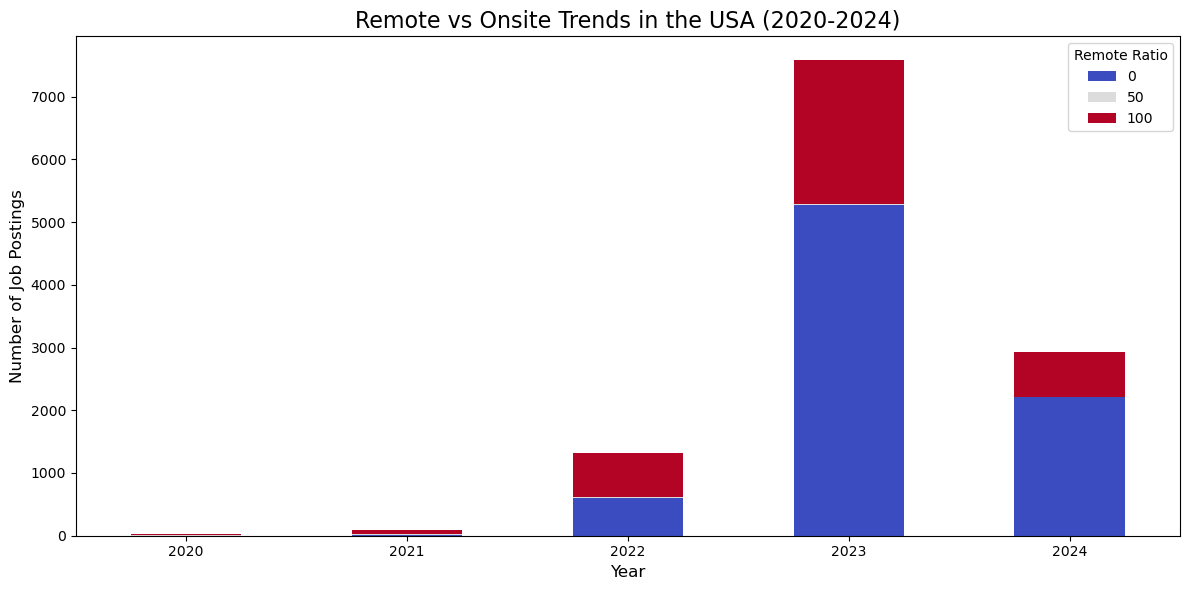

In [56]:
# Filter data for the USA
usa_data = job_data[job_data['employee_residence'] == 'US']

# Group data by year and remote ratio
remote_onsite_trends_usa = usa_data.groupby(['work_year', 'remote_ratio'])['job_title'].count().unstack()

# Plot for USA trends
plt.figure(figsize=(12, 6))
remote_onsite_trends_usa.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm', ax=plt.gca())
plt.title("Remote vs Onsite Trends in the USA (2020-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Remote Ratio", fontsize=10)
plt.tight_layout()
plt.show()

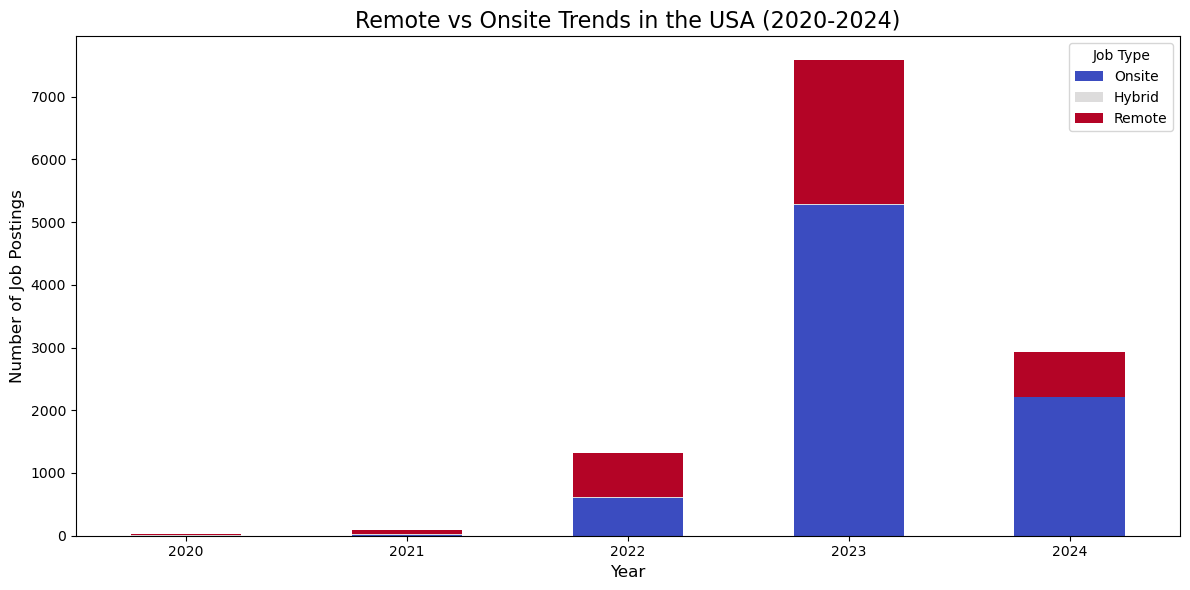

In [57]:
# Relabel the remote_ratio categories for better readability
remote_onsite_trends_usa = usa_data.groupby(['work_year', 'remote_ratio'])['job_title'].count().unstack()
remote_onsite_trends_usa.columns = ['Onsite', 'Hybrid', 'Remote']  # Renaming the columns

# Plot the stacked bar chart with relabeled legends
plt.figure(figsize=(12, 6))
remote_onsite_trends_usa.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm', ax=plt.gca())
plt.title("Remote vs Onsite Trends in the USA (2020-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Job Type", fontsize=10)  # Updated legend title
plt.tight_layout()
plt.show()

In [61]:
print(job_data['work_year'].value_counts())


work_year
2023    8518
2024    3267
2022    1652
2021     218
2020      75
Name: count, dtype: int64


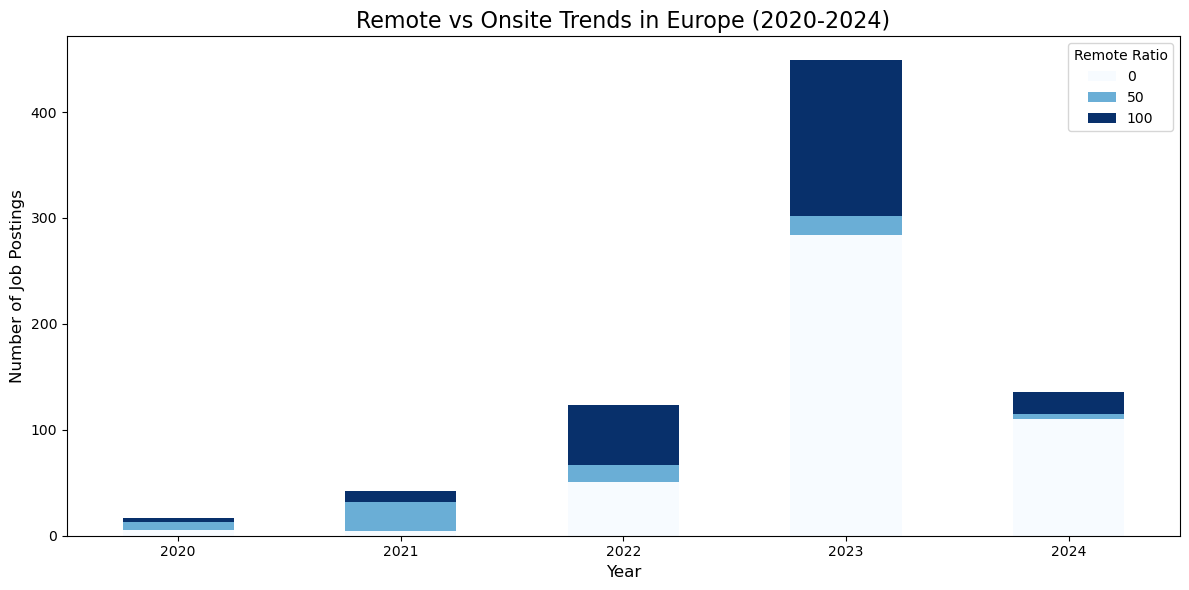

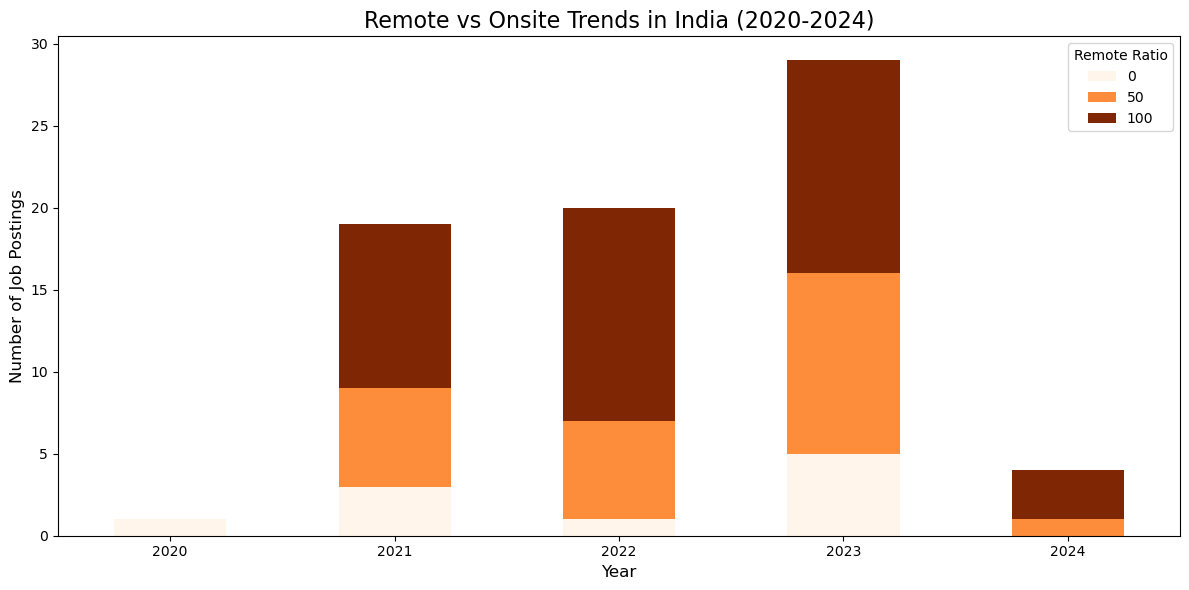

In [54]:
# Filter data for Europe and India
europe_countries = ['GB', 'DE', 'FR', 'IT']  # Example European countries (add more if needed)
europe_data = job_data[job_data['employee_residence'].isin(europe_countries)]
india_data = job_data[job_data['employee_residence'] == 'IN']

# Group by year and remote ratio for each region
remote_onsite_trends_europe = europe_data.groupby(['work_year', 'remote_ratio'])['job_title'].count().unstack()
remote_onsite_trends_india = india_data.groupby(['work_year', 'remote_ratio'])['job_title'].count().unstack()

# Visualization for Europe trends
plt.figure(figsize=(12, 6))
remote_onsite_trends_europe.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Blues', ax=plt.gca())
plt.title("Remote vs Onsite Trends in Europe (2020-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Remote Ratio", fontsize=10)
plt.tight_layout()
plt.show()

# Visualization for India trends
plt.figure(figsize=(12, 6))
remote_onsite_trends_india.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Oranges', ax=plt.gca())
plt.title("Remote vs Onsite Trends in India (2020-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Remote Ratio", fontsize=10)
plt.tight_layout()
plt.show()

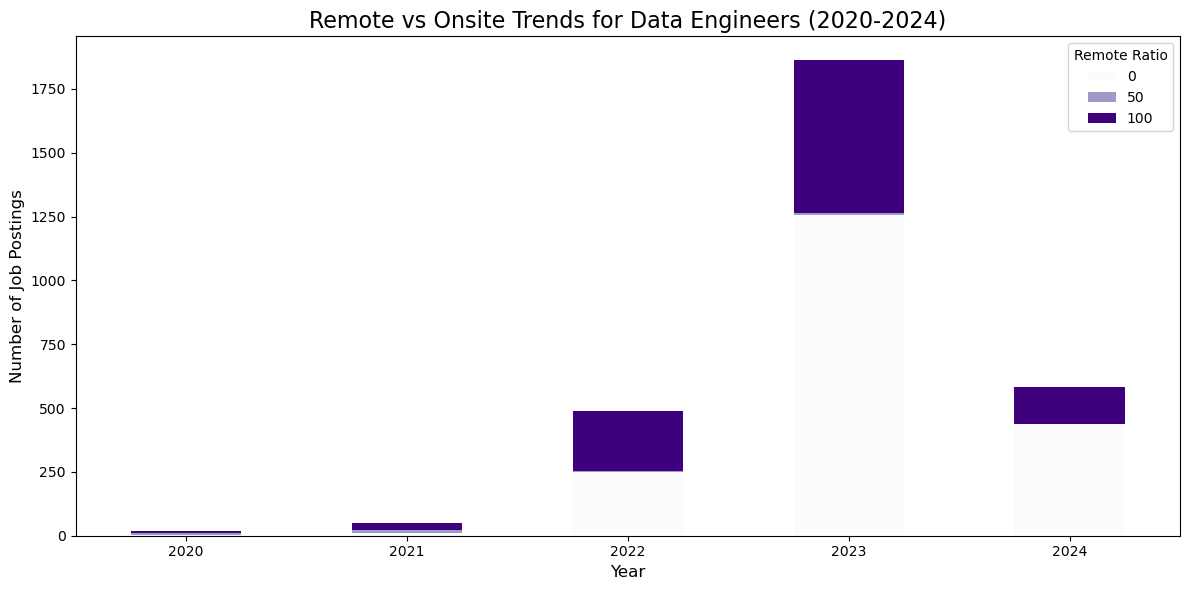

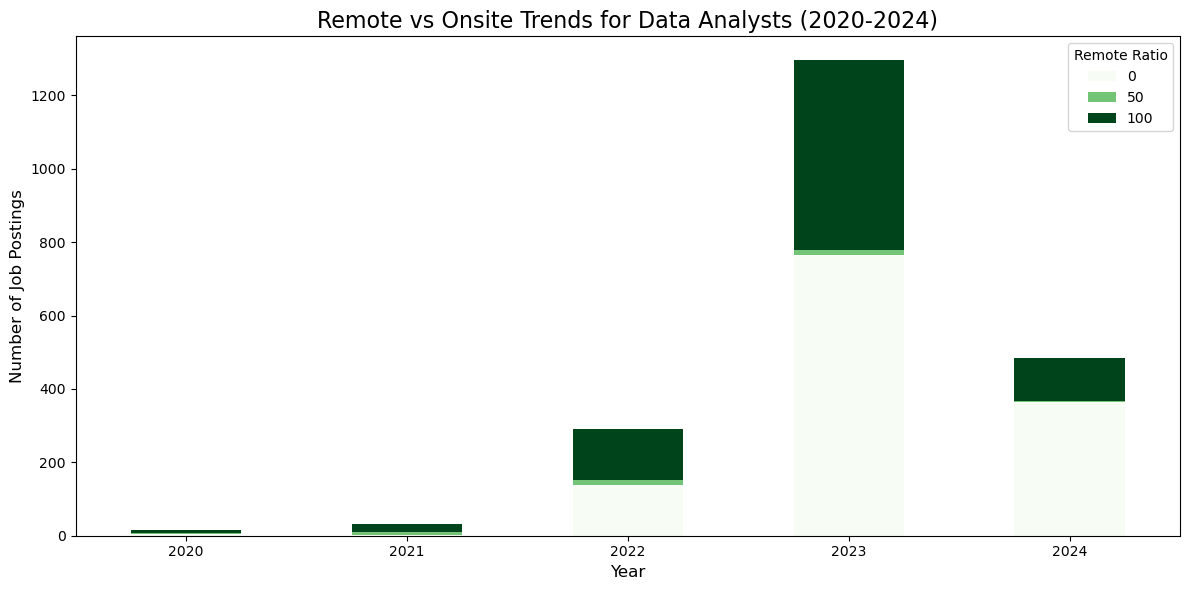

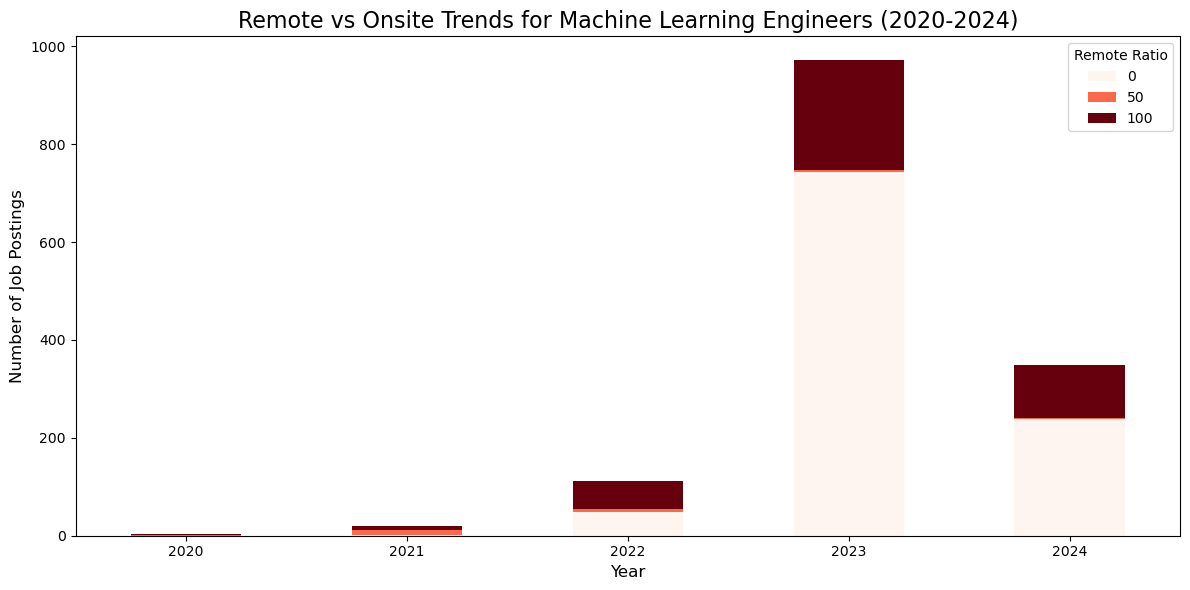

In [55]:
# Filter data for specific job categories
data_engineer_data = job_data[job_data['job_title'].str.contains('Data Engineer', case=False, na=False)]
data_analyst_data = job_data[job_data['job_title'].str.contains('Data Analyst', case=False, na=False)]
ml_engineer_data = job_data[job_data['job_title'].str.contains('Machine Learning Engineer', case=False, na=False)]

# Group by year and remote ratio for each job category
remote_onsite_trends_de = data_engineer_data.groupby(['work_year', 'remote_ratio'])['job_title'].count().unstack()
remote_onsite_trends_da = data_analyst_data.groupby(['work_year', 'remote_ratio'])['job_title'].count().unstack()
remote_onsite_trends_ml = ml_engineer_data.groupby(['work_year', 'remote_ratio'])['job_title'].count().unstack()

# Visualization for Data Engineers
plt.figure(figsize=(12, 6))
remote_onsite_trends_de.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Purples', ax=plt.gca())
plt.title("Remote vs Onsite Trends for Data Engineers (2020-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Remote Ratio", fontsize=10)
plt.tight_layout()
plt.show()

# Visualization for Data Analysts
plt.figure(figsize=(12, 6))
remote_onsite_trends_da.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Greens', ax=plt.gca())
plt.title("Remote vs Onsite Trends for Data Analysts (2020-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Remote Ratio", fontsize=10)
plt.tight_layout()
plt.show()

# Visualization for Machine Learning Engineers
plt.figure(figsize=(12, 6))
remote_onsite_trends_ml.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Reds', ax=plt.gca())
plt.title("Remote vs Onsite Trends for Machine Learning Engineers (2020-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Remote Ratio", fontsize=10)
plt.tight_layout()
plt.show()


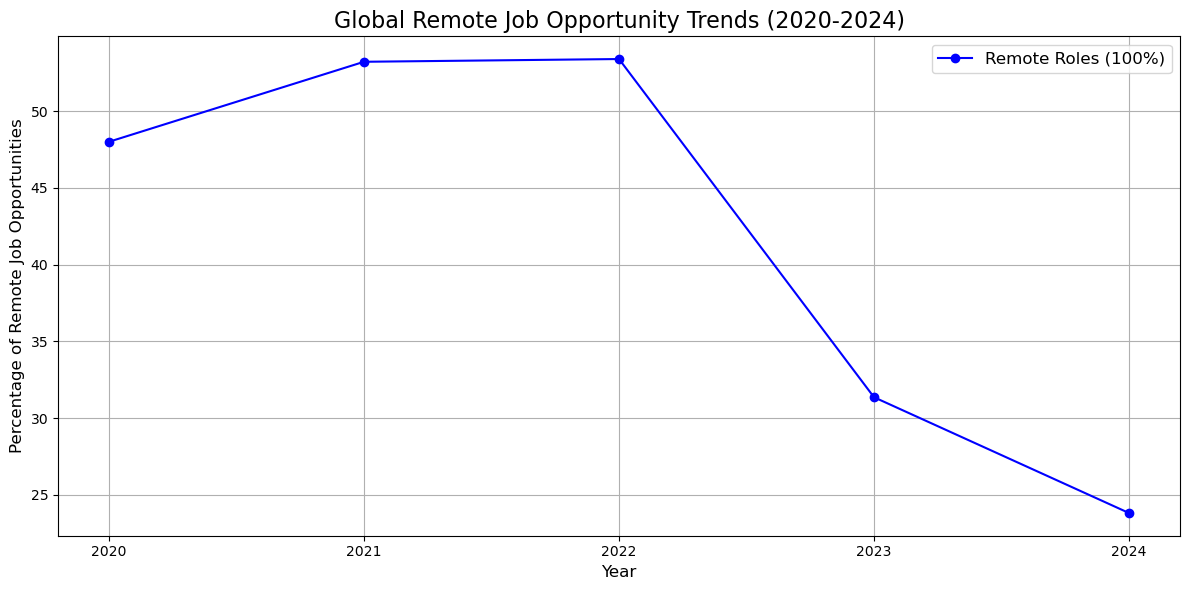

In [62]:
# Group by year and remote_ratio to calculate global remote opportunities
global_remote_trends = job_data.groupby(['work_year', 'remote_ratio'])['job_title'].count().unstack()

# Normalize data to show the proportion of remote roles globally
global_remote_trends_percentage = global_remote_trends.div(global_remote_trends.sum(axis=1), axis=0) * 100

# Plot global trends
plt.figure(figsize=(12, 6))
global_remote_trends_percentage[100].plot(kind='line', marker='o', label='Remote Roles (100%)', color='blue')
plt.title("Global Remote Job Opportunity Trends (2020-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Remote Job Opportunities", fontsize=12)
plt.xticks(global_remote_trends_percentage.index, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

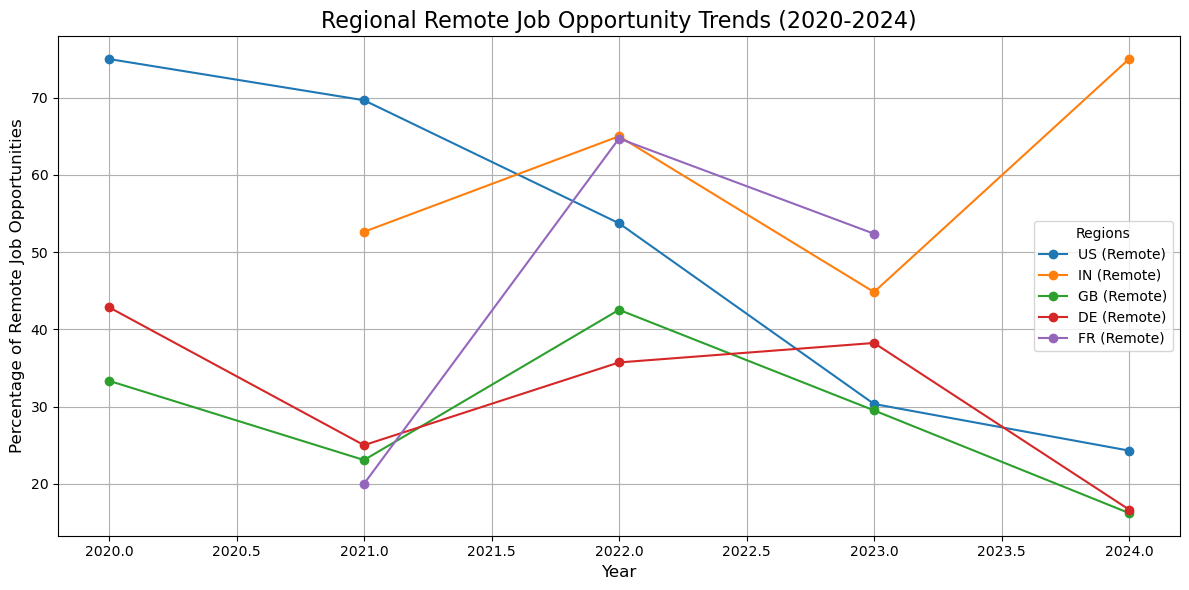

In [63]:
# Define regions of interest
regions = ['US', 'IN', 'GB', 'DE', 'FR']  # Add more regions if needed

# Filter data for selected regions
regional_data = job_data[job_data['employee_residence'].isin(regions)]

# Group by year, remote_ratio, and region
regional_remote_trends = regional_data.groupby(['work_year', 'employee_residence', 'remote_ratio'])['job_title'].count().unstack()

# Normalize data for each region
regional_remote_trends_percentage = regional_remote_trends.div(regional_remote_trends.sum(axis=1), axis=0) * 100

# Plot regional trends
plt.figure(figsize=(12, 6))
for region in regions:
    regional_data_filtered = regional_remote_trends_percentage.xs(region, level='employee_residence')
    plt.plot(regional_data_filtered.index, regional_data_filtered[100], marker='o', label=f"{region} (Remote)")

plt.title("Regional Remote Job Opportunity Trends (2020-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Remote Job Opportunities", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Regions", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

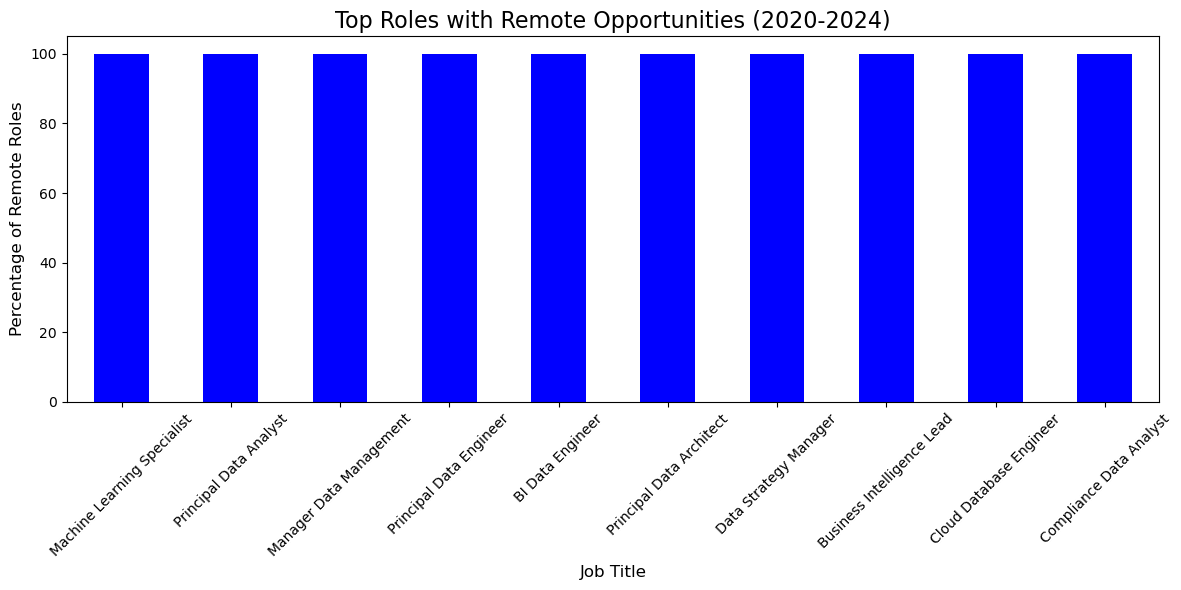

In [64]:
# Group by job title and remote_ratio to analyze remote trends by role
role_remote_trends = job_data.groupby(['job_title', 'remote_ratio'])['job_title'].count().unstack()

# Normalize data to show the percentage of remote roles for each job title
role_remote_trends_percentage = role_remote_trends.div(role_remote_trends.sum(axis=1), axis=0) * 100

# Sort by the percentage of remote roles (100%)
top_remote_roles = role_remote_trends_percentage[100].sort_values(ascending=False).head(10)

# Plot the top roles with remote opportunities
plt.figure(figsize=(12, 6))
top_remote_roles.plot(kind='bar', color='blue')
plt.title("Top Roles with Remote Opportunities (2020-2024)", fontsize=16)
plt.xlabel("Job Title", fontsize=12)
plt.ylabel("Percentage of Remote Roles", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

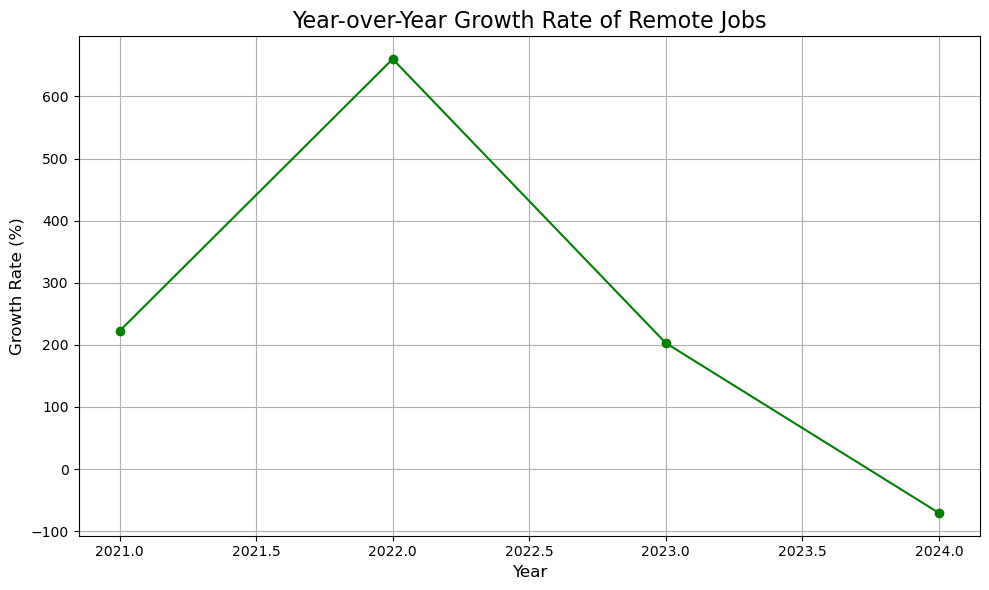

In [65]:
# Group by year and calculate the total number of remote roles (remote_ratio = 100)
global_remote_growth = job_data[job_data['remote_ratio'] == 100].groupby('work_year')['job_title'].count()

# Calculate year-over-year growth rate
remote_growth_rate = global_remote_growth.pct_change() * 100

# Plot the growth rate
plt.figure(figsize=(10, 6))
remote_growth_rate.plot(kind='line', marker='o', color='green')
plt.title("Year-over-Year Growth Rate of Remote Jobs", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Growth Rate (%)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

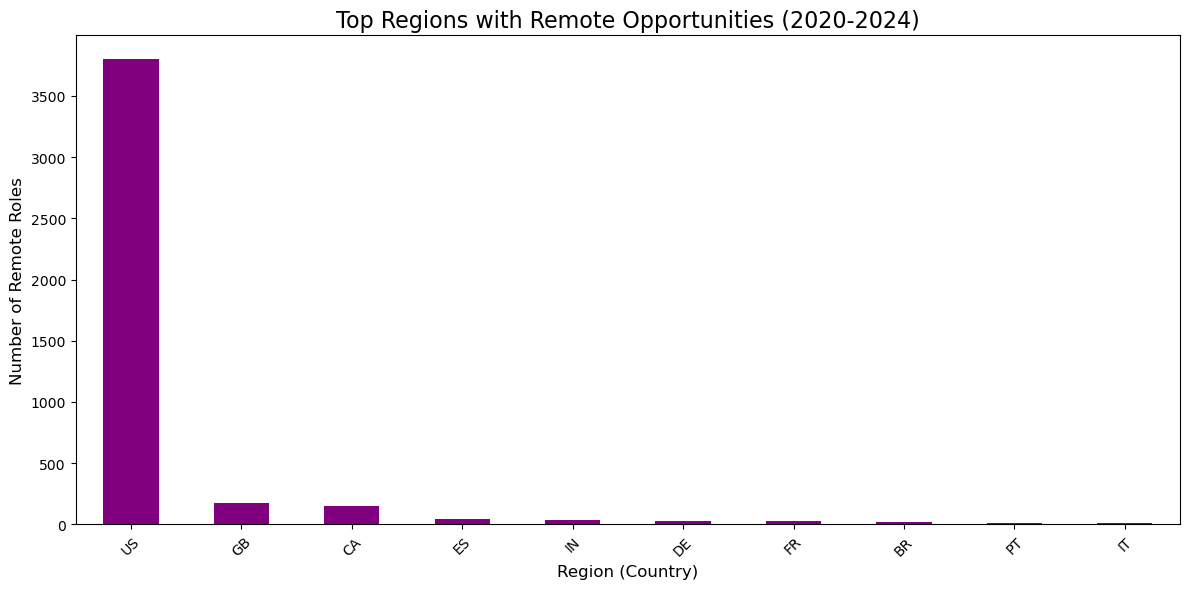

In [66]:
# Group by region (employee_residence) and remote_ratio to analyze distribution
regional_remote_distribution = job_data[job_data['remote_ratio'] == 100].groupby('employee_residence')['job_title'].count()

# Sort and plot the top regions with remote roles
top_remote_regions = regional_remote_distribution.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_remote_regions.plot(kind='bar', color='purple')
plt.title("Top Regions with Remote Opportunities (2020-2024)", fontsize=16)
plt.xlabel("Region (Country)", fontsize=12)
plt.ylabel("Number of Remote Roles", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

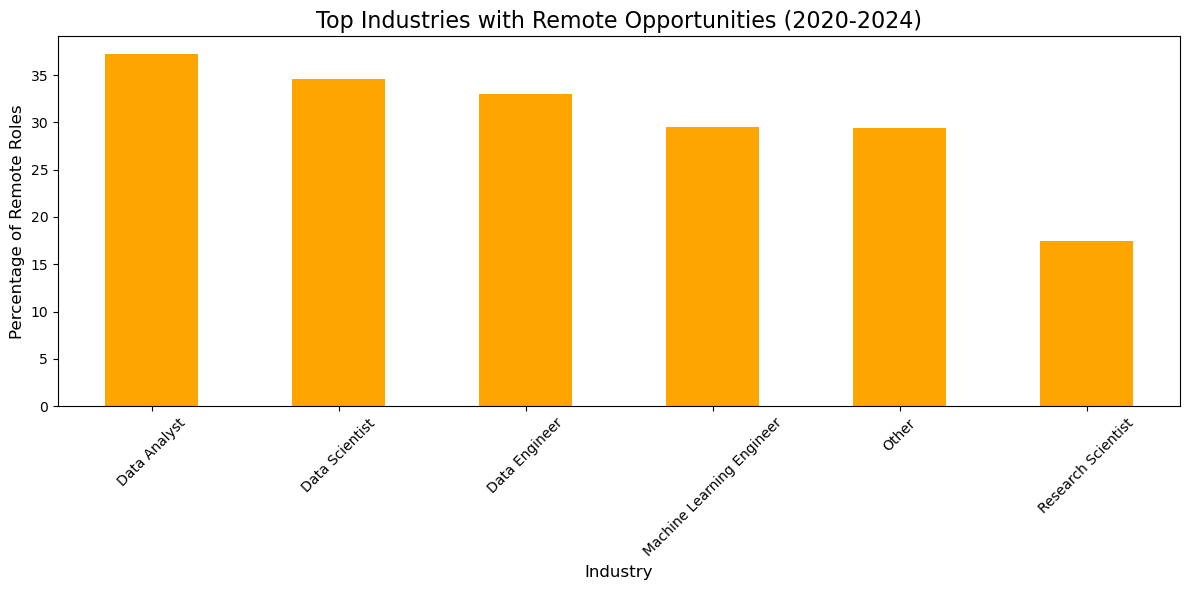

In [67]:
# Group by Job_Category and remote_ratio to analyze remote trends by industry
industry_remote_trends = job_data.groupby(['Job_Category', 'remote_ratio'])['job_title'].count().unstack()

# Normalize data to show the percentage of remote roles for each industry
industry_remote_trends_percentage = industry_remote_trends.div(industry_remote_trends.sum(axis=1), axis=0) * 100

# Sort by the percentage of remote roles (100%)
top_remote_industries = industry_remote_trends_percentage[100].sort_values(ascending=False).head(10)

# Plot the top industries with remote opportunities
plt.figure(figsize=(12, 6))
top_remote_industries.plot(kind='bar', color='orange')
plt.title("Top Industries with Remote Opportunities (2020-2024)", fontsize=16)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Percentage of Remote Roles", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [70]:
# Check non-numeric data in salary_in_usd
print("Non-numeric data in salary_in_usd:")
print(job_data[pd.to_numeric(job_data['salary_in_usd'], errors='coerce').isna()]['salary_in_usd'].unique())

# Check non-numeric data in experience_level
print("Non-numeric data in experience_level:")
print(job_data[pd.to_numeric(job_data['experience_level'], errors='coerce').isna()]['experience_level'].unique())


Non-numeric data in salary_in_usd:
[]
Non-numeric data in experience_level:
['MI' 'EN' 'SE' 'EX']


In [71]:
# Convert salary_in_usd to numeric and drop invalid rows
job_data['salary_in_usd'] = pd.to_numeric(job_data['salary_in_usd'], errors='coerce')
job_data['experience_level'] = pd.to_numeric(job_data['experience_level'], errors='coerce')

# Drop rows with missing or invalid values
job_data_cleaned = job_data.dropna(subset=['salary_in_usd', 'experience_level'])


In [72]:
# Convert salary_in_usd to numeric and drop invalid rows
job_data['salary_in_usd'] = pd.to_numeric(job_data['salary_in_usd'], errors='coerce')
job_data['experience_level'] = pd.to_numeric(job_data['experience_level'], errors='coerce')

# Drop rows with missing or invalid values
job_data_cleaned = job_data.dropna(subset=['salary_in_usd', 'experience_level'])


c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\yzmen\anaconda3\envs\dev\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


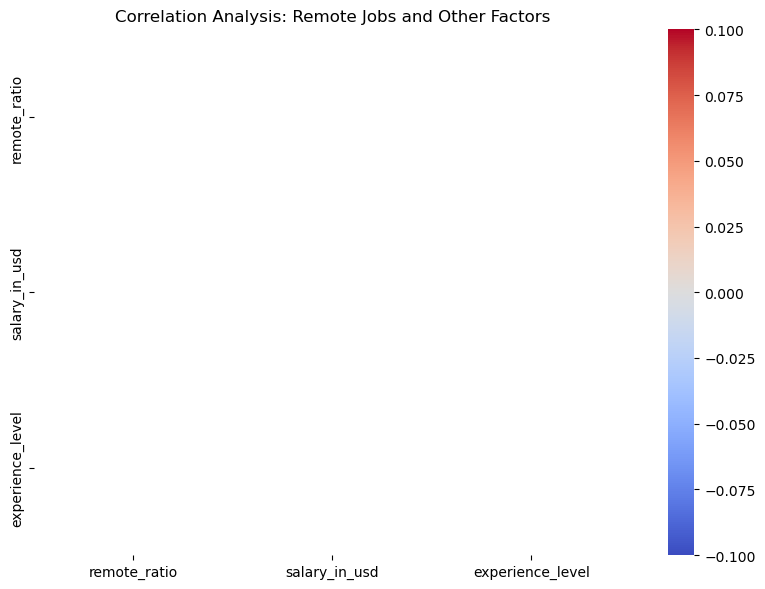

In [73]:
numeric_columns = job_data_cleaned[['remote_ratio', 'salary_in_usd', 'experience_level']]
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Analysis: Remote Jobs and Other Factors")
plt.tight_layout()
plt.show()


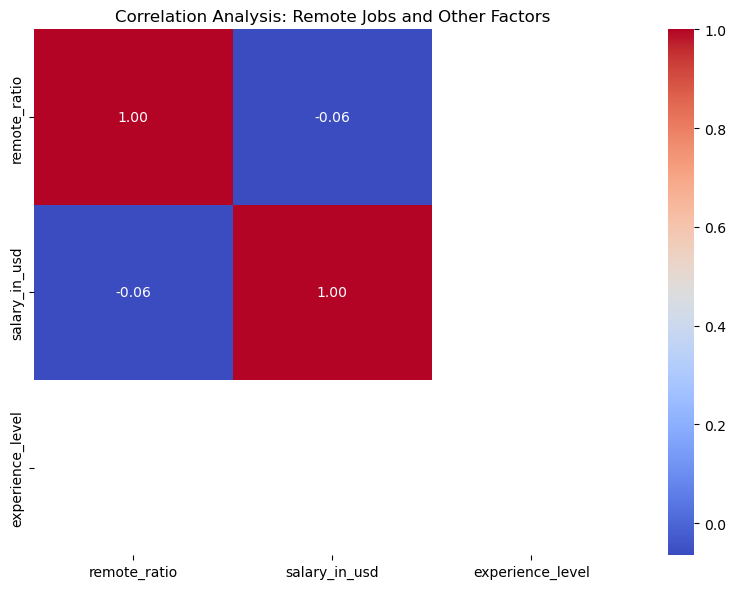

In [74]:
# Select relevant numeric columns for correlation
numeric_columns = job_data[['remote_ratio', 'salary_in_usd', 'experience_level']]

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Analysis: Remote Jobs and Other Factors")
plt.tight_layout()
plt.show()

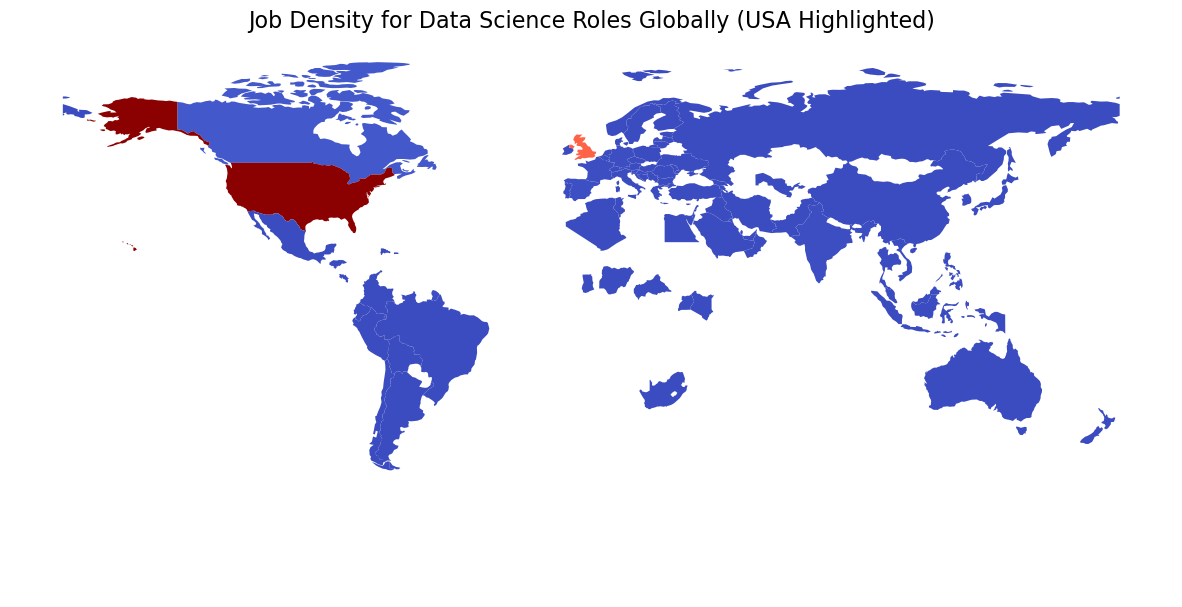

In [75]:
# Merge the job data with the world map
merged_world = world.merge(region_data, on='ADM0_A3', how='left')

# Define a custom colormap
import matplotlib.colors as mcolors

# Custom colormap: USA (dark red), UK (light red), and the rest follow a gradient
custom_colors = {
    'USA': '#8B0000',  # Dark Red
    'GBR': '#FF6347',  # Light Red
}
default_cmap = plt.cm.coolwarm

# Create a new column for color mapping
merged_world['custom_color'] = merged_world['ADM0_A3'].map(custom_colors)

# Use the job count for other regions with the default colormap
merged_world['custom_color'] = merged_world['custom_color'].fillna(
    merged_world['job_count'].apply(lambda x: default_cmap((x - merged_world['job_count'].min()) / 
                                                           (merged_world['job_count'].max() - merged_world['job_count'].min())))
)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_world.plot(
    color=merged_world['custom_color'],
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey"}
)
plt.title("Job Density for Data Science Roles Globally (USA Highlighted)", fontsize=16)
plt.axis("off")
plt.show()

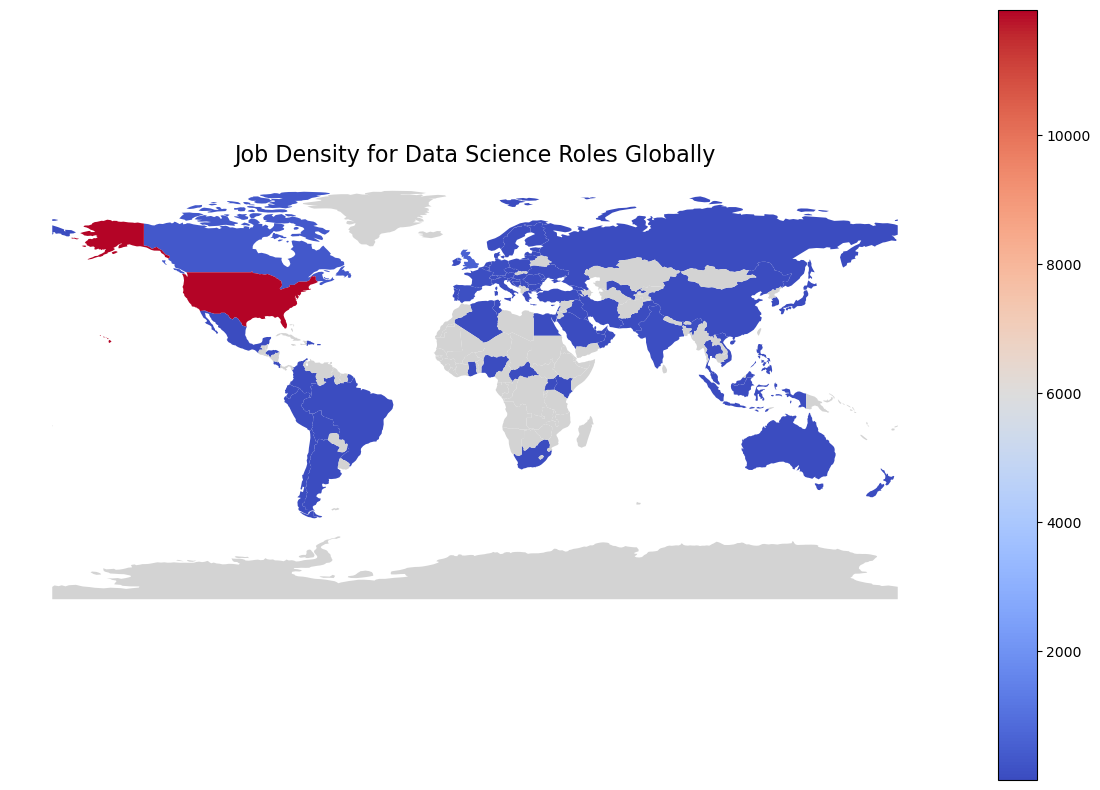

In [76]:
# Merge the job data with the world map
merged_world = world.merge(region_data, on='ADM0_A3', how='left')

# Plot the map dynamically based on job counts
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_world.plot(
    column='job_count',              # Color countries based on job counts
    cmap='coolwarm',                 # Gradient color scheme
    legend=True,                     # Add a legend for context
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "No Data"}  # Grey for missing data
)

# Add title and remove axes
plt.title("Job Density for Data Science Roles Globally", fontsize=16)
plt.axis("off")
plt.show()


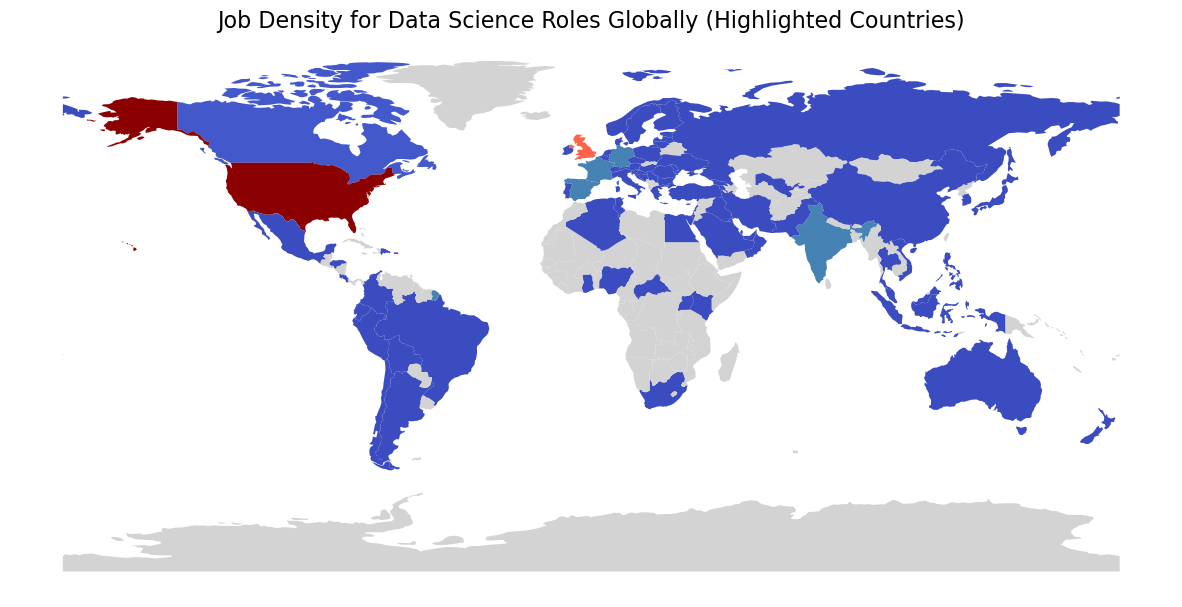

In [77]:
# Merge the job data with the world map
merged_world = world.merge(region_data, on='ADM0_A3', how='left')

# Custom colors for specific countries
custom_colors = {
    'USA': '#8B0000',  # Dark Red
    'GBR': '#FF6347',  # Light Red
    'IND': '#4682B4',  # Light Blue for India
    'ESP': '#4682B4',  # Light Blue for Spain
    'FRA': '#4682B4',  # Light Blue for France
    'DEU': '#4682B4',  # Light Blue for Germany
}

# Apply custom colors
merged_world['custom_color'] = merged_world['ADM0_A3'].map(custom_colors)

# Use job density for other regions
default_cmap = plt.cm.coolwarm
merged_world['custom_color'] = merged_world['custom_color'].fillna(
    merged_world['job_count'].apply(lambda x: 
        default_cmap((x - merged_world['job_count'].min()) / 
                     (merged_world['job_count'].max() - merged_world['job_count'].min())) 
        if pd.notnull(x) else 'lightgrey')  # Grey for missing data
)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_world.plot(
    color=merged_world['custom_color'],
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey"}  # Grey for no data
)
plt.title("Job Density for Data Science Roles Globally (Highlighted Countries)", fontsize=16)
plt.axis("off")
plt.show()
